In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression Algorithm 

In [18]:
train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [19]:
learning_rate = 0.01
epochs = 2000
display_steps = 50
n_sample = train_x.shape[0]

In [20]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [21]:
activation = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(activation-Y, 2)) / (2*n_sample)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

 Epoch:  50  Cost:  0.0945226  W:  0.32377073  b:  0.26784113
 Epoch:  100  Cost:  0.092493005  W:  0.31935903  b:  0.29957876
 Epoch:  150  Cost:  0.09069801  W:  0.31520978  b:  0.3294284
 Epoch:  200  Cost:  0.08911057  W:  0.31130728  b:  0.3575025
 Epoch:  250  Cost:  0.08770663  W:  0.3076369  b:  0.3839074
 Epoch:  300  Cost:  0.08646506  W:  0.30418473  b:  0.40874165
 Epoch:  350  Cost:  0.08536707  W:  0.30093795  b:  0.43209857
 Epoch:  400  Cost:  0.08439601  W:  0.2978842  b:  0.45406705
 Epoch:  450  Cost:  0.083537325  W:  0.29501203  b:  0.47472918
 Epoch:  500  Cost:  0.08277798  W:  0.29231086  b:  0.49416122
 Epoch:  550  Cost:  0.082106516  W:  0.28977028  b:  0.5124379
 Epoch:  600  Cost:  0.08151277  W:  0.28738093  b:  0.52962697
 Epoch:  650  Cost:  0.08098772  W:  0.28513357  b:  0.54579467
 Epoch:  700  Cost:  0.08052343  W:  0.28301972  b:  0.5610011
 Epoch:  750  Cost:  0.08011291  W:  0.28103152  b:  0.5753036
 Epoch:  800  Cost:  0.07974991  W:  0.27916163

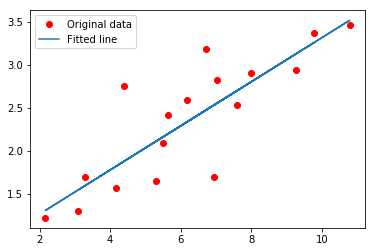

In [22]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(epochs):
        for (x,y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
        if (epoch + 1) % display_steps == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print(" Epoch: ", epoch+1, " Cost: ", c," W: ", sess.run(W), " b: ", sess.run(b))
    print("Optimization Finished!")
    
    training_cost = sess.run(cost, feed_dict={X:train_x, Y:train_y})
    print(" Training Cost: ",training_cost, " W: ", sess.run(W), " b: ", sess.run(b))
    
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W)*train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    

## Multi-feature Linear Regression

In [23]:
def feature_normalize(features):
    for feature in features.T:
        fmean = np.mean(feature)
        frange = np.amax(feature) - np.amin(feature)
        feature -= fmean
        feature /= frange
    return features

#### Hyperparameter

In [24]:
learning_rate = 0.01
epochs = 1000
display_step = 50

#### Dataset { X: [200 x 3] , Y: [200 x 1] } i.e 3 features (column)

In [25]:
train_X = np.random.rand(200,3) * 10
train_Y = np.random.rand(200,1) * 100  
train_X = feature_normalize(train_X)

In [26]:
m, n = train_X.shape

X = tf.placeholder(tf.float32, [m, n])
Y = tf.placeholder(tf.float32, [m, 1])

W = tf.Variable(tf.zeros([n, 1], dtype=np.float32), name="weight")
b = tf.Variable(tf.zeros([1], dtype=np.float32), name="bias")

In [27]:
activation = tf.add(tf.matmul(X, W), b)
cost = tf.reduce_sum(tf.square(activation - Y)) / (2*m)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [28]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        
        if step % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print ("Epoch:",step+1, "Cost: ",c, "W: ", sess.run(W), "b:", sess.run(b))

    print ("Training Done!")
    
    training_cost = sess.run(cost, feed_dict={X: np.asarray(train_X), Y: np.asarray(train_Y)})
    print("Training Cost: ", training_cost, "W: ", sess.run(W), "b: ", sess.run(b), '\n')

    predict_X = np.array([12, 13, 15], dtype=np.float32).reshape((1, 3))
    predict_X = predict_X / np.linalg.norm(predict_X)
    predict_Y = tf.add(tf.matmul(predict_X, W),b)
    print ("Predicted Output: ", sess.run(predict_Y))

Epoch: 1 Cost:  1784.1437 W:  [[-0.00400922]
 [ 0.00332063]
 [-0.00168938]] b: [0.5267377]
Epoch: 51 Cost:  922.02203 W:  [[-0.2002712 ]
 [ 0.16590033]
 [-0.08440978]] b: [21.1245]
Epoch: 101 Cost:  606.3782 W:  [[-0.38852635]
 [ 0.3218969 ]
 [-0.16379535]] b: [33.58626]
Epoch: 151 Cost:  490.76904 W:  [[-0.5691015 ]
 [ 0.47157714]
 [-0.23998055]] b: [41.1257]
Epoch: 201 Cost:  448.38483 W:  [[-0.7423097 ]
 [ 0.6151965 ]
 [-0.31309438]] b: [45.68712]
Epoch: 251 Cost:  432.8088 W:  [[-0.90845144]
 [ 0.75300056]
 [-0.3832606 ]] b: [48.4468]
Epoch: 301 Cost:  427.0503 W:  [[-1.0678151 ]
 [ 0.88522506]
 [-0.45059797]] b: [50.116432]
Epoch: 351 Cost:  424.89 W:  [[-1.220677  ]
 [ 1.0120958 ]
 [-0.51522064]] b: [51.126564]
Epoch: 401 Cost:  424.0509 W:  [[-1.3673027 ]
 [ 1.1338292 ]
 [-0.57723796]] b: [51.73769]
Epoch: 451 Cost:  423.69922 W:  [[-1.5079467 ]
 [ 1.2506341 ]
 [-0.63675505]] b: [52.107433]
Epoch: 501 Cost:  423.5295 W:  [[-1.6428529]
 [ 1.3627093]
 [-0.6938727]] b: [52.331127]
